In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load dataset
excel_file = r"C:\Users\kavin\OneDrive\Desktop\New folder (2)\New folder (2)\P8.xlsx"  # Change this to your file path
data = pd.read_excel(excel_file)

# Drop missing values
data = data.dropna()

# Print column names to verify
print("Columns in Dataset:", data.columns.tolist())

# Convert labels to numeric values (Novice = 0, Expert = 1)
label_encoder = LabelEncoder()
data['RESPONSE'] = label_encoder.fit_transform(data['RESPONSE'])

# Save label mapping
joblib.dump(label_encoder, 'label_mapping.pkl')

# Split features and target
X = data.drop(columns=['RESPONSE']).values  # Drop the RESPONSE column (features only)
y = data['RESPONSE'].values  # Target labels

# Normalize input data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalize features

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Reshape data for CNN + LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")
print(f"✅ Classes: {label_encoder.classes_}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Bidirectional, Reshape
from tensorflow.keras.layers import Dropout, BatchNormalization

# Define model
def build_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(256, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Reshape((64, 1)),
        BatchNormalization(),
        Bidirectional(LSTM(128, return_sequences=True)),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(32, return_sequences=True)),
        Flatten(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification (Novice vs Expert)
    ])
    return model

# Get input shape
input_shape = (X_train.shape[1], 1)

# Build and compile model
model = build_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ Model Compiled Successfully!")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Generate Sample Data (Replace with actual dataset)
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(0, 2, 1000)
X_test = np.random.rand(200, 20)
y_test = np.random.randint(0, 2, 200)

# Create Model Function
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize Model
model = create_model(input_shape=X_train.shape[1])

# Define Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train Model (Ensuring Full 50 Epochs)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, callbacks=[reduce_lr])  # Removed early_stop

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("trained_model.h5")
print("Model training complete and saved as 'trained_model.h5'")

In [ ]:
# Evaluate the model
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train Loss: {loss_train}, Train Accuracy: {accuracy_train}')
print(f'Test Loss: {loss_test}, Test Accuracy: {accuracy_test}')

In [ ]:
import matplotlib.pyplot as plt  # Import Matplotlib

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

       alpha    theta         beta       gamma   arousal  vigilance       tli  \
0  23.846972  7.541741  125.021870  233.829066  5.242673   0.251066  0.316256   
1   7.912097  3.706161   26.814170   11.457885  3.389009   0.433288  0.468417   
2   2.362878  0.496599    2.797195    1.583758  1.183808   1.022266  0.210167   
3   2.377480  1.537224    1.854219    0.636531  0.779909   2.111241  0.646577   
4   2.096265  0.592510    1.575877    0.577625  0.751755   1.706209  0.282650   

     neutral  cnsarousal    cpari   ...       varience         std  \
0  16.577323    0.060323  3.983020  ...  154245.098176  392.740497   
1   7.235025    0.138217  2.307934  ...   22261.079372  149.201472   
2   5.632699    0.177535  0.978219  ...     745.387187   27.301780   
3   1.206213    0.829041  0.473655  ...     280.086512   16.735785   
4   2.659662    0.375988  0.586095  ...     229.449968   15.147606   

           rms      skew      kurt  mobility  complexity    peak-peak  \
0  4060.232697  0.7

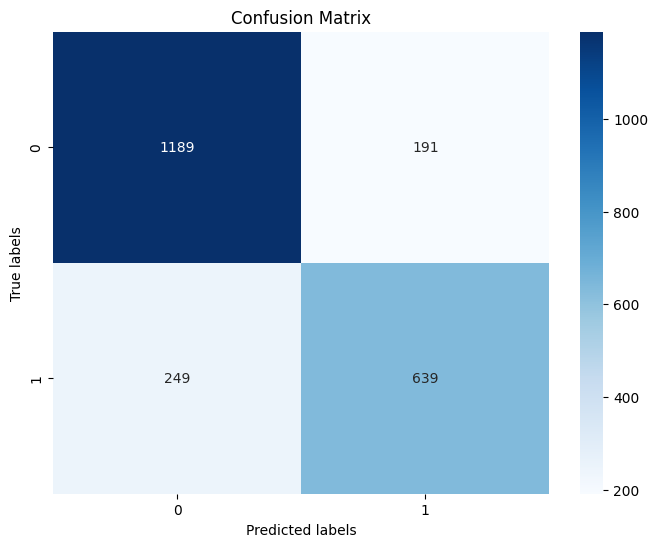

Model Accuracy: 0.81


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# ✅ Load dataset from Excel
file_path = r"C:\Users\kavin\OneDrive\Desktop\New folder (2)\New folder (2)\P8.xlsx"  # Your uploaded dataset
df = pd.read_excel(file_path)

# ✅ Check the first few rows to understand the dataset structure
print(df.head())

# ✅ Encode categorical labels (assuming 'RESPONSE' is the target variable)
label_encoder = LabelEncoder()
df['RESPONSE'] = label_encoder.fit_transform(df['RESPONSE'])

# ✅ Separate features (X) and target labels (y)
X = df.drop(columns=['RESPONSE'])  # Drop the target column
y = df['RESPONSE']

# ✅ Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Normalize features (important for models that rely on distance metrics)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Train a simple classification model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Make predictions
y_pred = model.predict(X_test)

# ✅ Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ✅ Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

In [2]:

from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_])

# Print classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1380
           1       0.77      0.72      0.74       888

    accuracy                           0.81      2268
   macro avg       0.80      0.79      0.79      2268
weighted avg       0.80      0.81      0.80      2268

